## Measuring Bitcoin and 6 other cryptocurrency prices over time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Pandas library is used for importing various file types e.g. csv, excel, json.
# also used for manipulation and cleaning dataframes.

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Matplotlib is a 2D plotting library for visualising data in Python

# sklearn is a library used for machine learning and statistical modeling.
# it includes many tools for classification, regression, clustering and dimensionality reduction

# Seaborn is used for improving Matplotlib visualisations to make them more visually attractive.
# It builds on top of MatPlotLib and works with Pandas for data structures

In [2]:
BTC = pd.read_csv("coin_Bitcoin2020-2024.csv")
ADA = pd.read_csv("coin_Cardano2020-2024.csv")
ETH = pd.read_csv("coin_Etherium2020-2024.csv")
SOL = pd.read_csv("coin_Solana2020-2024.csv")
MATIC = pd.read_csv("coin_Polygon2020-2024.csv")
AVAX = pd.read_csv("coin_Avalanche2020-2024.csv")
LINK = pd.read_csv("coin_Chainlink2020-2024.csv")

# importing the data after cleaning
# csvs from https://www.cryptodatadownload.com/data/binance/
# crypto price data from 2020 - 2024

In [3]:
df_btc = pd.read_csv("coin_Bitcoin2020-2024.csv")
df_ada = pd.read_csv("coin_Cardano2020-2024.csv")
df_eth = pd.read_csv("coin_Etherium2020-2024.csv")
df_sol = pd.read_csv("coin_Solana2020-2024.csv")
df_matic = pd.read_csv("coin_Polygon2020-2024.csv")
df_avalanche = pd.read_csv("coin_Avalanche2020-2024.csv")
df_chainlink = pd.read_csv("coin_Chainlink2020-2024.csv")

# storing each coin into their own dataframes

In [4]:
df_btc.head()

# showing first 5 rows of BTC data

,Name,Date,Symbol,Open,High,Low,Close,Volume BTC
0,Bitcoin,22/09/2020,BTC,10417.22,10572.71,10353.00,10529.61,43991.23548
1,Bitcoin,23/09/2020,BTC,10529.61,10537.15,10136.82,10241.46,51876.56808
2,Bitcoin,24/09/2020,BTC,10241.46,10795.24,10190.93,10736.32,57676.61943
3,Bitcoin,25/09/2020,BTC,10736.33,10760.53,10556.24,10686.67,48101.11701
4,Bitcoin,26/09/2020,BTC,10686.57,10820.94,10644.68,10728.60,28420.83666


In [5]:
df = pd.DataFrame({'BTC': df_btc['Close'],
                  'ETH': df_eth['Close'],
                  'ADA': df_ada['Close'],
                  'SOL': df_sol['Close'],
                  'AVAX': df_avalanche['Close'],
                  'MATIC': df_matic['Close'],
                  'LINK': df_chainlink['Close']})

# dataframe that holds the closing price of all 7 crypto currencies
# the 'closing price' is the price of the coin at the end of each day

In [6]:
df

,BTC,ETH,ADA,SOL,AVAX,MATIC,LINK
0,10529.61,344.21,0.08146,2.9082,5.3193,0.01959,8.7401
1,10241.46,320.72,0.07663,2.8548,3.5350,0.01769,7.6364
2,10736.32,348.97,0.08254,3.1433,4.6411,0.01895,9.8700
3,10686.67,351.92,0.09693,3.1937,4.7134,0.01912,10.7279
4,10728.60,353.92,0.09547,3.1287,4.5200,0.01883,10.3169
...,...,...,...,...,...,...,...
1234,45288.65,2419.55,0.53040,102.7600,35.4200,0.83370,18.2120
1235,47132.77,2486.56,0.54070,106.9400,38.0000,0.85260,18.4700
1236,47751.09,2500.24,0.55150,109.0100,40.2000,0.84870,19.0840
1237,48299.99,2507.21,0.54140,107.4600,39.7200,0.83550,20.1460


In [7]:
df.describe()

# looking at some stats of the 7 coins

,BTC,ETH,ADA,SOL,AVAX,MATIC,LINK
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,33603.855989,2054.185456,0.761091,52.839715,30.646510,0.911549,14.827727
std,13047.177291,939.171070,0.626212,54.617344,27.783059,0.555113,9.258483
min,10241.460000,320.720000,0.076630,1.198000,2.902600,0.012220,5.133000
25%,22953.330000,1549.285000,0.318900,19.455000,12.760000,0.578850,7.123500
50%,30472.000000,1848.840000,0.466200,31.365000,18.230000,0.852200,12.403800
75%,42966.300000,2556.275000,1.171600,77.161500,37.008700,1.228550,20.310000
max,67525.830000,4807.980000,2.966000,258.440000,134.840000,2.876000,52.269000


## Prices over Time (before scaling)

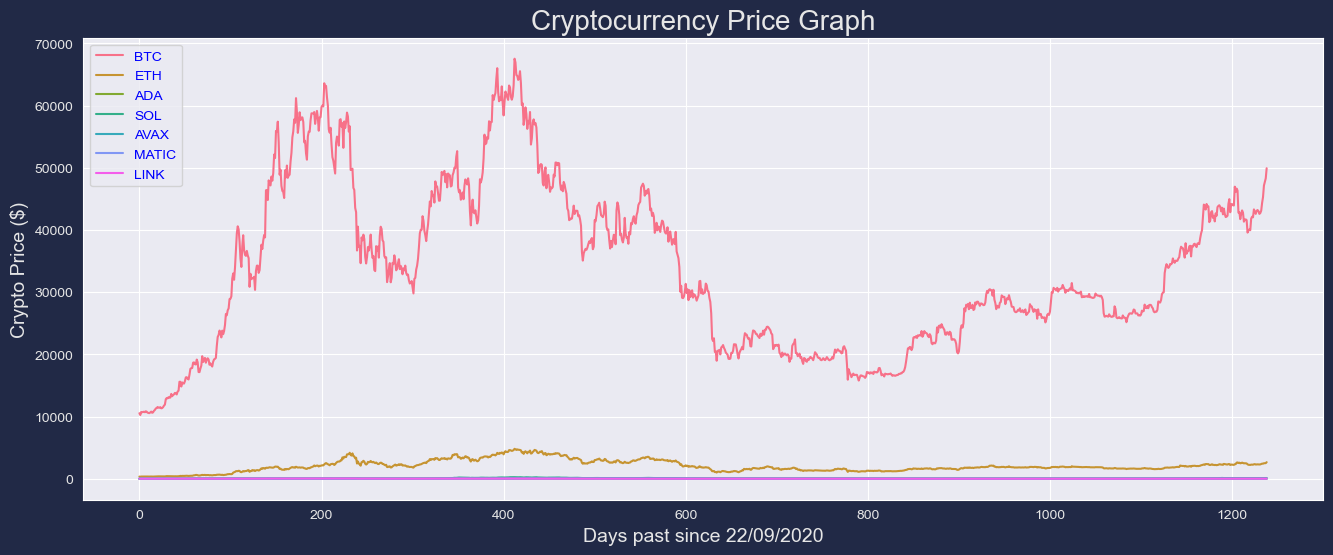

In [8]:
# Setting Seaborn style
sns.set_style('dark')

# Setting color palette with number of colors equal to the number of cryptocurrencies
num_colors = len(df.columns)
colors = sns.color_palette("husl", num_colors)

# Applying custom color settings
plt.rcParams['figure.facecolor'] = '#212946'
plt.rcParams['lines.markerfacecolor'] = '#212946'
plt.rcParams['savefig.facecolor'] = '#212946'
plt.rcParams['text.color'] = '0.9'
plt.rcParams['axes.labelcolor'] = '0.9'
plt.rcParams['xtick.color'] = '0.9'
plt.rcParams['ytick.color'] = '0.9'

# Load cryptocurrency data
my_crypto = df

# Plotting
plt.figure(figsize=(16, 6))
for i, c in enumerate(my_crypto.columns):
    plt.plot(my_crypto.index, my_crypto[c], label=c, color=colors[i])

# Adding title and labels
plt.title('Cryptocurrency Price Graph', fontsize=20)
plt.xlabel('Days past since 22/09/2020', fontsize=14)  # Change x-axis label
plt.ylabel('Crypto Price ($)', fontsize=14)

# Adding legend
plt.legend(my_crypto.columns.values, loc='upper left', prop={'size': 15})

# Styling legend text
legend = plt.legend()
plt.setp(legend.get_texts(), color='b')

# Adding grid
plt.grid()

# Show plot
plt.show()


## Scaling the Data

In [9]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)
scaled

# scaling the data so the price of altcoins (non-bitcoin coins) become more meaningful in the graph

array([[ 0.50301679,  0.52348204,  0.16716447, ...,  1.831702  ,
         0.25735217,  7.65253734],
       [ 0.        ,  0.        ,  0.        , ...,  0.47931822,
         0.19100629,  5.31101494],
       [ 0.86386566,  0.62956013,  0.20454286, ...,  1.31767035,
         0.23500409, 10.04964358],
       ...,
       [65.47969368, 48.57128849, 16.43507062, ..., 28.26901243,
        29.20894761, 29.59733537],
       [66.43789571, 48.72661713, 16.08551345, ..., 27.90520353,
        28.74801835, 31.85039036],
       [69.26114401, 52.13136747, 16.7015647 , ..., 28.85262253,
        30.28444922, 32.52715547]])

In [10]:
df_scale = pd.DataFrame(scaled, columns = df.columns)

# converting the array of scaled data into a dataframe

## Scaled Prices Over Time

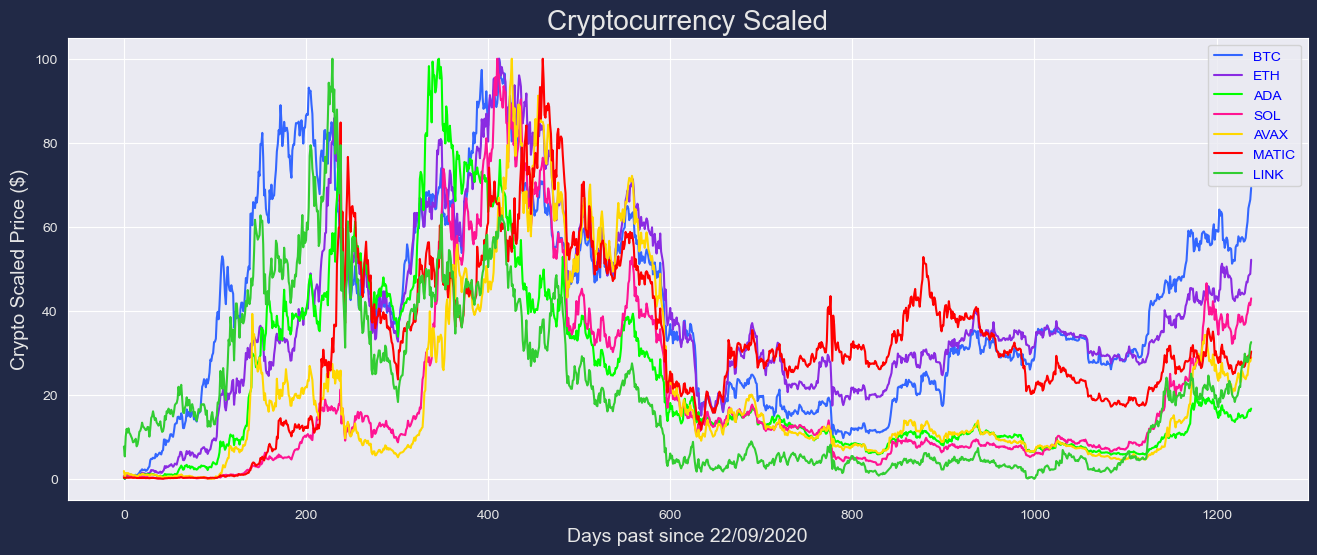

In [11]:
# Define a custom color palette with red, blue, purple, and green
colors = ['#3366FF', '#8A2BE2', '#00FF00', '#FF1493', '#FFD700', '#9400D3', '#32CD32', '#4169E1', '#FF4500', '#800080', '#20B2AA', '#808000', '#6495ED', '#FF69B4']

# Load scaled cryptocurrency data
my_crypto = df_scale

# Plotting
plt.figure(figsize=(16, 6))
for i, c in enumerate(my_crypto.columns.values):
    if c == 'MATIC':
        plt.plot(my_crypto.index, my_crypto[c], label=c, color='red')
    else:
        plt.plot(my_crypto.index, my_crypto[c], label=c, color=colors[i % len(colors)])

# Adding title and labels
plt.title('Cryptocurrency Scaled', fontsize=20)
plt.xlabel('Days past since 22/09/2020', fontsize=14)
plt.ylabel('Crypto Scaled Price ($)', fontsize=14)

# Adding legend
plt.legend(my_crypto.columns.values, loc='upper left', prop={'size': 15})

# Styling legend text
legend = plt.legend()
plt.setp(legend.get_texts(), color='blue')

# Adding grid
plt.grid()

# Show plot
plt.show()

## Measuring the Daily Return

In [12]:
DR = df.pct_change(1)
DR
# getting the daily return

,BTC,ETH,ADA,SOL,AVAX,MATIC,LINK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.027366,-0.068243,-0.059293,-0.018362,-0.335439,-0.096988,-0.126280
2,0.048319,0.088083,0.077124,0.101058,0.312900,0.071227,0.292494
3,-0.004624,0.008453,0.174340,0.016034,0.015578,0.008971,0.086920
4,0.003924,0.005683,-0.015062,-0.020353,-0.041032,-0.015167,-0.038311
...,...,...,...,...,...,...,...
1234,0.021174,-0.002289,0.056153,0.016017,0.003968,-0.000719,-0.032152
1235,0.040719,0.027695,0.019419,0.040677,0.072840,0.022670,0.014166
1236,0.013119,0.005502,0.019974,0.019357,0.057895,-0.004574,0.033243
1237,0.011495,0.002788,-0.018314,-0.014219,-0.011940,-0.015553,0.055649


## Distribution of Daily Returns visualised using a Violin Plot

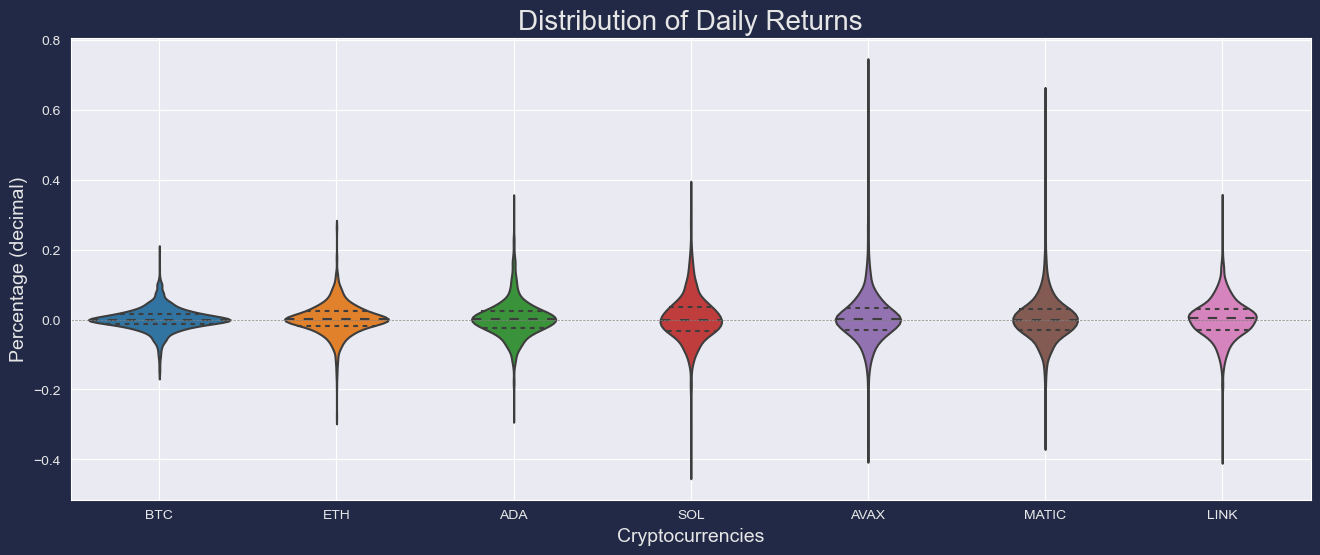

In [13]:
# Create a violin plot for the daily returns
plt.figure(figsize=(16, 6))
sns.violinplot(data=DR, inner='quartile')

plt.title('Distribution of Daily Returns', fontsize=20)
plt.ylabel('Percentage (decimal)', fontsize=14)
plt.xlabel('Cryptocurrencies', fontsize=14)

# Adding zero return line
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Adding grid
plt.grid()

plt.show()

#### As can be seen from the violin graph above, BTC has the lowest distribution of daily returns
#### From this particular time period, it looks like AVAX & MATIC have the widest distribution of daily returns, followed closely by SOL

## Measuring the Volatility

In [14]:
DR.std()

# the standard deviation - Representing the price volatility

BTC      0.033510
ETH      0.043512
ADA      0.052993
SOL      0.068317
AVAX     0.069352
MATIC    0.072723
LINK     0.056714
dtype: float64

### Volatility Ranking
#### By comparing the standard deviations, we can rank the cryptocurrencies from least to most volatile.
#### In this case, BTC has the lowest volatility (standard deviation of 0.033510), indicating relatively stable price movements compared to other cryptocurrencies.
#### On the other hand, MATIC has the highest volatility (standard deviation of 0.072723), suggesting that its price experiences larger fluctuations over time. At least between 22/09/2020 and the present day, 13/02/2024, this has been the case.

## Average Daily Return of each coin

In [15]:
DR.mean()

# using the mean average to measure daily average return of these coins

BTC      0.001818
ETH      0.002601
ADA      0.002928
SOL      0.005266
AVAX     0.003966
MATIC    0.005525
LINK     0.002305
dtype: float64

#### BTC has had the lowest average daily returns since 22/09/2020 by quite a considerable amount (0.001818)
#### However, it is also the least volatile, and the least risky.
#### MATIC and SOL have had very high average daily returns since 22/09/2020 (0.005525 and 0.005266 respectively)
#### However, these are also very volatile, and the most risky

## Price Correlation Between Coins

In [16]:
DR.corr()

# shows the correlation between these coins

,BTC,ETH,ADA,SOL,AVAX,MATIC,LINK
BTC,1.000000,0.803395,0.635600,0.525020,0.554234,0.573440,0.672591
ETH,0.803395,1.000000,0.683157,0.607164,0.589168,0.657945,0.761995
ADA,0.635600,0.683157,1.000000,0.534164,0.640775,0.619149,0.676086
SOL,0.525020,0.607164,0.534164,1.000000,0.561257,0.520066,0.555691
AVAX,0.554234,0.589168,0.640775,0.561257,1.000000,0.563449,0.584937
MATIC,0.573440,0.657945,0.619149,0.520066,0.563449,1.000000,0.629289
LINK,0.672591,0.761995,0.676086,0.555691,0.584937,0.629289,1.000000


#### ETH & BTC have a high price correlation with each other (0.8)
#### ADA & LINK both still have a positive correlation (0.64 & 0.67 respectively) with BTC but this relationship is not as strong as ETH & BTC as shown in the heatmap below

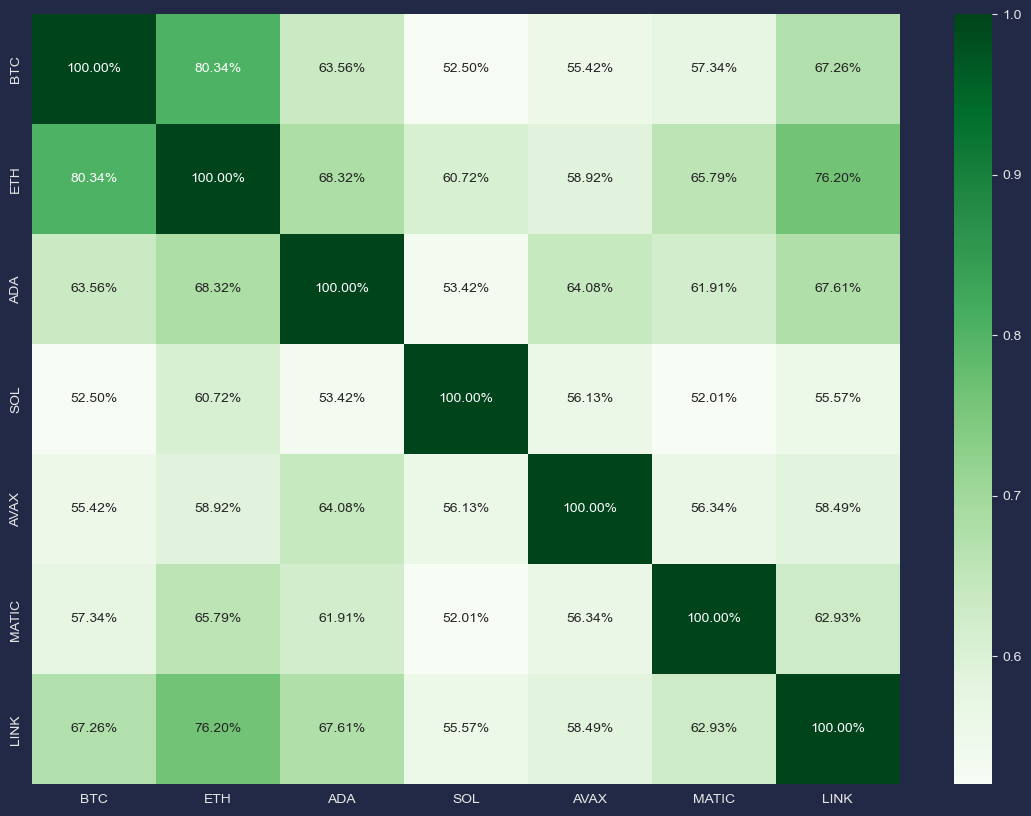

In [17]:
plt.subplots(figsize= (14, 10))
sns.heatmap(DR.corr(), annot= True, fmt= '0.2%', cmap="Greens")
plt.show()

# this visualises the correlation between the currencies
# (Dark green=higher correlation, white=lower correlation)

## Daily Cumulative Returns

In [18]:
DCR = (DR+1).cumprod()
DCR

# getting the cumulative product if you bought £1 of each of these coins in 22/09/2020

,BTC,ETH,ADA,SOL,AVAX,MATIC,LINK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.972634,0.931757,0.940707,0.981638,0.664561,0.903012,0.873720
2,1.019631,1.013829,1.013258,1.080840,0.872502,0.967330,1.129278
3,1.014916,1.022399,1.189909,1.098171,0.886094,0.976008,1.227434
4,1.018898,1.028210,1.171986,1.075820,0.849736,0.961205,1.180410
...,...,...,...,...,...,...,...
1234,4.301076,7.029284,6.511171,35.334571,6.658771,42.557427,2.083729
1235,4.476212,7.223962,6.637614,36.771886,7.143797,43.522205,2.113248
1236,4.534934,7.263705,6.770194,37.483667,7.557385,43.323124,2.183499
1237,4.587064,7.283955,6.646207,36.950691,7.467148,42.649311,2.305008


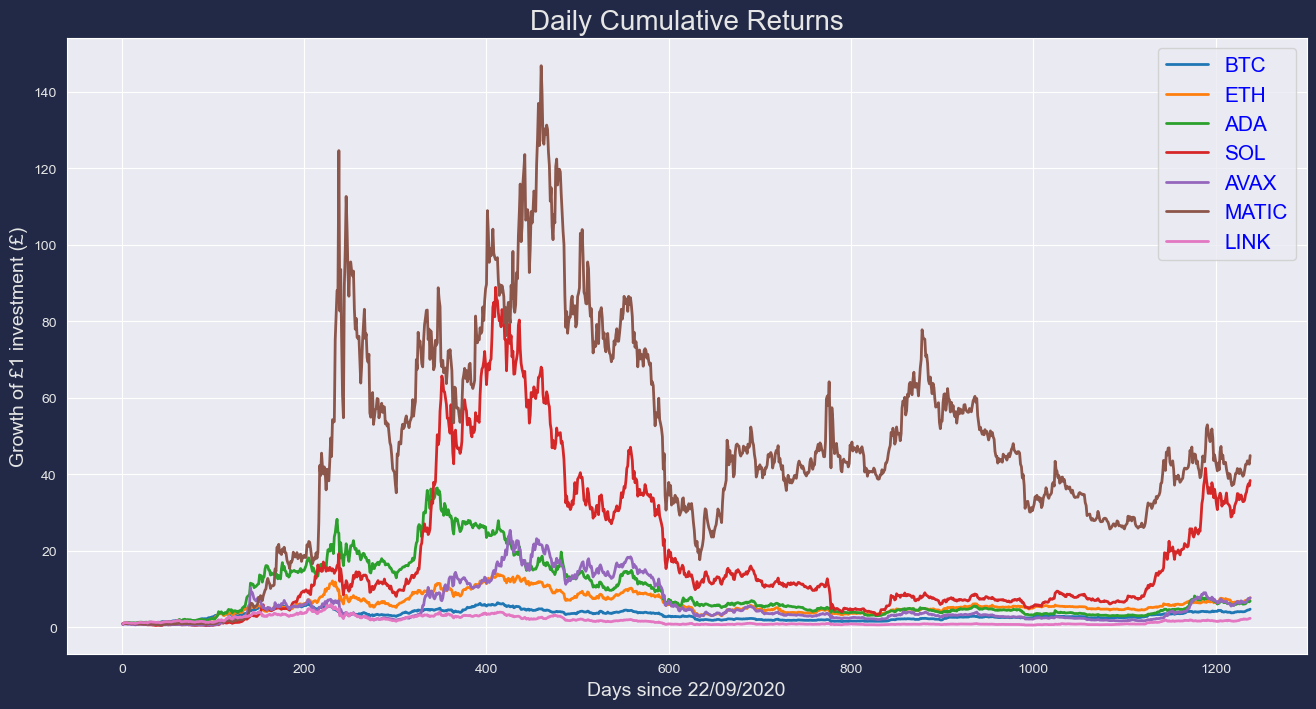

In [19]:
plt.figure(figsize=(16, 8))

for c in DCR.columns.values:
    plt.plot(DCR.index, DCR[c], lw=2, label=c)

plt.title('Daily Cumulative Returns', fontsize=20)
plt.xlabel('Days since 22/09/2020', fontsize=14)
plt.ylabel('Growth of £1 investment (£)', fontsize=14)
plt.legend(DCR.columns.values, loc='upper left', fontsize=10)
legend = plt.legend(prop={'size': 15})
plt.setp(legend.get_texts(), color='b')
plt.grid()
plt.show()


### Inconsistent Time Periods:
#### The length of the time period over which cumulative returns are calculated can vary, leading to inconsistencies in comparisons between different cryptocurrencies or investment strategies. Without a standardized time frame, it's challenging to make meaningful comparisons or draw conclusions about relative performance.
#### In this case, the time period these are measured from were around both Avalanche's and Solana's ICO (Initial Coin Offering) in late 2020